In [1]:
import pandas as pd
import numpy as np

In [2]:
# Classifiers importation
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import neural_network
from sklearn.naive_bayes import BernoulliNB

# Others
import seaborn as sns
from sklearn import linear_model, metrics, model_selection
from sklearn.preprocessing import StandardScaler

## Authors ##

In [3]:
filename = './clean_newauthors.csv'
df_authors = pd.read_csv(filename, sep=",")

Mirem Ratio de zeros que ens donarà una idea de la accuracy que hauriem de treure:

In [4]:
zero_ratio_FC = df_authors.loc[df_authors.index[df_authors['FC'] > 0]].shape[0]/df_authors.shape[0]
zero_ratio_RT = df_authors.loc[df_authors.index[df_authors['RT'] > 0]].shape[0]/df_authors.shape[0]

print('Una accuarcy semblant a aquest ratios seria dolenta, ha de ser molt més')
print(1-zero_ratio_FC, 1-zero_ratio_RT)

Una accuarcy semblant a aquest ratios seria dolenta, ha de ser molt més
0.3873002523128679 0.6455004205214465


Distribució de les dades en porcentatge:

total sum: 2378


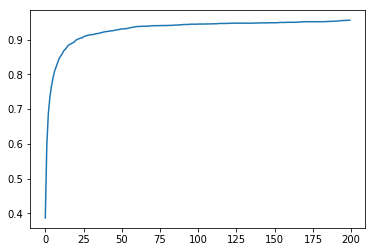

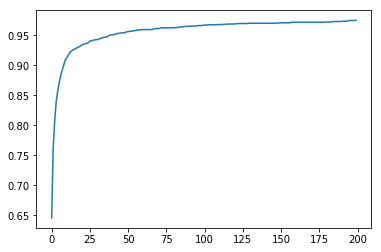

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

N = 200
s1, s2 = 0, 0
p1, p2 = [], []
x = range(N)
tsum = df_authors.shape[0]
print('total sum: %s' % tsum)

for i in range(N):
    s1 = s1 + df_authors[df_authors['FC']==i].shape[0]
    s2 = s2 + df_authors[df_authors['RT']==i].shape[0]
    p1.append(s1/tsum)
    p2.append(s2/tsum)
    #print(i,s1,s2)

plt.plot(x, p1)
plt.show()
plt.plot(x, p2)
plt.show()

    FC -> class'0': [0,4]   class'1': [5,50]   class'2': [50,inf)
    RT -> class'0': [0,2]   class'1': [5,50]   class'2': [50,inf)

In [24]:
a = np.zeros(df_authors.shape[0])
idx = np.where(df_authors['FC'].values < 5)[0]
a[idx] = 0
idx = np.where((df_authors['FC'].values >= 5) & (df_authors['FC'].values <= 50))[0]
a[idx] = 1
idx = np.where(df_authors['FC'].values > 50)[0]
a[idx] = 2  

df_authors['FC_class'] = a

b = np.zeros(df_authors.shape[0])
idx = np.where(df_authors['RT'].values < 5)[0]
b[idx] = 0
idx = np.where((df_authors['RT'].values >= 5) & (df_authors['RT'].values <= 50))[0]
b[idx] = 1
idx = np.where(df_authors['RT'].values > 50)[0]
b[idx] = 2  

df_authors['RT_class'] = b

In [26]:
df_authors.head()

,Unnamed: 0,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,followers_count,friends_count,listed_count,favourites_count,statuses_count,FC_class,RT_class
0,0,2.4,3.929377,15.5,32.022648,0.0,0.0,19645.0,949.0,662.0,12334.0,55829.0,0.0,0.0
1,1,0.2,0.600000,0.8,0.979796,1.0,0.0,4221.0,281.0,340.0,587.0,13650.0,0.0,0.0
2,2,17.9,13.626812,37.2,40.931162,21.0,10.0,1133925.0,1.0,9745.0,16.0,65228.0,1.0,1.0
3,3,0.4,0.489898,1.7,3.796051,0.0,0.0,5386.0,3861.0,304.0,15325.0,85493.0,0.0,0.0
4,4,2.3,5.216321,3.4,6.545227,0.0,0.0,1072.0,433.0,101.0,899.0,19893.0,0.0,0.0


Classificadors per classe '0', '1' o '2' per FC: 

In [33]:
classifiers = [ neural_network.MLPClassifier(),
                linear_model.LogisticRegression(),
                KNeighborsClassifier(3),
                SVC(kernel="rbf", C=1, probability=True),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
              ]

In [34]:
X = df_authors[['RT_l10', 'sd_RT', 'FC_l10', 'sd_FC', 'friends_count', 'followers_count', 'listed_count', 'favourites_count', 'statuses_count']]
Y = df_authors['FC_class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=42)

for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    yhat_prob = clf.predict_proba(X_test)

MLPClassifier 0.6162464985994398
LogisticRegression 0.8375350140056023
KNeighborsClassifier 0.7815126050420168
SVC 0.7899159663865546
DecisionTreeClassifier 0.7941176470588235
RandomForestClassifier 0.8207282913165266
AdaBoostClassifier 0.8403361344537815
GradientBoostingClassifier 0.8235294117647058


Since the AdaBoostClassifier have the largest accuaracy we will keep the parameters of this model to allocate the users of the application to each class regarding the FC. Now we use the whole Dataset to train the classifier.

In [35]:
FC_class = AdaBoostClassifier()
FC_class.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Classificadors per classe '0', '1', '2' per RT: 

In [36]:
classifiers = [ neural_network.MLPClassifier(),
                linear_model.LogisticRegression(),
                KNeighborsClassifier(3),
                SVC(kernel="rbf", C=1, probability=True),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
              ]

In [37]:
X = df_authors[['RT_l10', 'sd_RT', 'FC_l10', 'sd_FC', 'friends_count', 'followers_count', 'listed_count', 'favourites_count', 'statuses_count']]
Y = df_authors['RT_class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=42)

for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    yhat_prob = clf.predict_proba(X_test)

MLPClassifier 0.5854341736694678
LogisticRegression 0.8823529411764706
KNeighborsClassifier 0.8515406162464986
SVC 0.8613445378151261
DecisionTreeClassifier 0.8557422969187675
RandomForestClassifier 0.8921568627450981
AdaBoostClassifier 0.8865546218487395
GradientBoostingClassifier 0.8851540616246498


Since the AdaBoostClassifier have the largest accuaracy we will keep the parameters of this model to allocate the users of the application to each class regarding the RT. Now we use the whole Dataset to train the classifier.

In [38]:
RT_class = AdaBoostClassifier()
RT_class.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Ara que ja tenim definides les classes de FC i RT farem un model per cada classe, en total 6, 3 per FC i 3 per RT.

## Tweets Dataset ##

In [59]:
import ast
import re #regular expressions
import unidecode as udc
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from unicodedata import normalize

In [60]:
#X['location'] = [ast.literal_eval(data['j_user'][i])['location'] for i in range(X.shape[0])]
filename = './tweet.csv'
df_tweets = pd.read_csv(filename, sep=",")

In [61]:
df_tweets = df_tweets[['Tweet','FC','RT']]
df_tweets.head()

,Tweet,FC,RT
0,Desde el #FCJumilla damos nuestra más sincera ...,18,4
1,Me estoy volviendo loca hasta por cada una de ...,0,0
2,🏟 | El #FCJumilla ya está en La Condomina ⚽️...,4,2
3,📹 | El vestuario del #FCJumilla en La Condomin...,21,6
4,📑 Jornada 6 | El colegiado andaluz Guzmán Mans...,0,0


Check number of zeros in  'FC' and 'RT' of our sample:

In [62]:
zero_ratio_FC = df_tweets.loc[df_tweets.index[df_tweets['FC'] > 0]].shape[0]/df_tweets.shape[0]
zero_ratio_RT = df_tweets.loc[df_tweets.index[df_tweets['RT'] > 0]].shape[0]/df_tweets.shape[0]

print('Una accuarcy semblant a aquest ratios seria dolenta, ha de ser molt més')
print(1-zero_ratio_FC, 1-zero_ratio_RT)

Una accuarcy semblant a aquest ratios seria dolenta, ha de ser molt més
0.40010965246261154 0.6620267430172703


In [63]:
c = np.zeros(df_tweets.shape[0])
idx = np.where(df_tweets['FC'].values < 5)[0]
c[idx] = 0
idx = np.where((df_tweets['FC'].values >= 5) & (df_tweets['FC'].values <= 50))[0]
c[idx] = 1
idx = np.where(df_tweets['FC'].values > 50)[0]
c[idx] = 2  

df_tweets['FC_class'] = c

d = np.zeros(df_tweets.shape[0])
idx = np.where(df_tweets['RT'].values < 5)[0]
d[idx] = 0
idx = np.where((df_tweets['RT'].values >= 5) & (df_tweets['RT'].values <= 50))[0]
d[idx] = 1
idx = np.where(df_tweets['RT'].values > 50)[0]
d[idx] = 2  

df_tweets['RT_class'] = d

In [64]:
df_tweets.head()

,Tweet,FC,RT,FC_class,RT_class
0,Desde el #FCJumilla damos nuestra más sincera ...,18,4,1.0,0.0
1,Me estoy volviendo loca hasta por cada una de ...,0,0,0.0,0.0
2,🏟 | El #FCJumilla ya está en La Condomina ⚽️...,4,2,0.0,0.0
3,📹 | El vestuario del #FCJumilla en La Condomin...,21,6,1.0,1.0
4,📑 Jornada 6 | El colegiado andaluz Guzmán Mans...,0,0,0.0,0.0


Comensem pels models definits com a classe'1' en FC i RT. Primer dividim per intervals peruqè predir exactament un número és imporssible. En total N intervals. A mesura que els FC i els RT augmenten també augmenta l'amplada del interval:

In [65]:
class segmenta():
    
    def __init__(self):
        self.intervals = {}
    
    def transform(self,y):
        k, z = 0, 0
        for a, b in [[10,5],
                     [100,30],
                     [1000,200],
                     [5000,1000],
                     [10000,2500],
                     [50000,5000]]: 
            for i in np.arange(z,a,b):
                self.intervals[k] = [i,i+b-1]
                k+=1
            z = a
        self.intervals[k] = [50000,99999999]

        C = np.zeros(len(y))
        for j in self.intervals:
            c = self.intervals[j]
            idx = np.where(np.logical_and(y>=c[0],y<=c[1]))[0]
            C[idx] = j

        return C

In [66]:
seg = segmenta()
df_tweets['FC_int'] = seg.transform(df_tweets['FC'])
df_tweets['RT_int'] = seg.transform(df_tweets['RT'])
df_tweets.head()

,Tweet,FC,RT,FC_class,RT_class,FC_int,RT_int
0,Desde el #FCJumilla damos nuestra más sincera ...,18,4,1.0,0.0,2.0,0.0
1,Me estoy volviendo loca hasta por cada una de ...,0,0,0.0,0.0,0.0,0.0
2,🏟 | El #FCJumilla ya está en La Condomina ⚽️...,4,2,0.0,0.0,0.0,0.0
3,📹 | El vestuario del #FCJumilla en La Condomin...,21,6,1.0,1.0,2.0,1.0
4,📑 Jornada 6 | El colegiado andaluz Guzmán Mans...,0,0,0.0,0.0,0.0,0.0


Separem la BBDD en 4 en funció de la classe assignada previament amb els 2 models d'authors (classe '0' i '1' a FC i RT):

In [67]:
FC_C0 = df_tweets[df_tweets['FC_class']==0] 
FC_C1 = df_tweets[df_tweets['FC_class']==1]
FC_C2 = df_tweets[df_tweets['FC_class']==2]

RT_C0 = df_tweets[df_tweets['RT_class']==0] 
RT_C1 = df_tweets[df_tweets['RT_class']==1] 
RT_C2 = df_tweets[df_tweets['RT_class']==2] 

In [68]:
print(FC_C0.shape, FC_C1.shape, FC_C2.shape, RT_C0.shape, RT_C1.shape, RT_C2.shape)

(25651, 7) (5094, 7) (2086, 7) (28475, 7) (3033, 7) (1323, 7)


Token, analyze, ...

Script Núria en el que es treuen les paraules que no aporten informació com conectors, articles, ... per utilitzaro com a stop words en el 'CountVectorizer':

In [69]:
#filename = './eliminar_paraules.xlsx'
#elim = pd.read_excel(filename, header=None)

#y=elim[0]
#for i in range(len(elim)):
#    y[i] = re.sub(
#            r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
#            normalize( "NFD", y[i]), 0, re.I)
#y = y.tolist()

### Model FC_C0: ###

### Model FC_C1: ###

In [76]:
vect_FC_C1 = CountVectorizer(min_df=0.0005, stop_words="english", strip_accents='unicode') # Tweets stop_words=y

X = FC_C1['Tweet']
Y = FC_C1['FC_int']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=42)

#Process and convert data 
X_train = vect_FC_C1.fit_transform(X_train).todense()
y_train = y_train.values

X_test = vect_FC_C1.transform(X_test).todense()
y_test = y_test.values

In [77]:
print(X_train.shape)
print(X_test.shape)

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(X_train[np.where(X_train.sum(axis=1)>0)].shape[1]/X_train.shape[0])
print(X_test[np.where(X_test.sum(axis=1)>0)].shape[1]/X_test.shape[0])

(3565, 4287)
(1529, 4287)
0.9957924263674615
0.9895356442119032


In [78]:
classifiers = [ neural_network.MLPClassifier(),
                linear_model.LogisticRegression(),
                KNeighborsClassifier(3),
                SVC(kernel="rbf", C=1, probability=True),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
              ]

In [ ]:
for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    yhat_prob = clf.predict_proba(X_test)

MLPClassifier 0.3277623026926648
LogisticRegression 0.3584029712163417
KNeighborsClassifier 0.3282265552460539


In [ ]:
FC_C1_tweet = ### CLASSIFIER() ###
FC_C1_tweet.fit(X,Y)

### Model FC_C2: ###

In [ ]:
vect_FC_C2 = CountVectorizer(min_df=0.0005, stop_words="english", strip_accents='unicode') # Tweets stop_words=y

X = FC_C2['Tweet']
Y = FC_C2['FC_int']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=42)

#Process and convert data 
X_train = vect_FC_C2.fit_transform(X_train).todense()
y_train = y_train.values

X_test = vect_FC_C2.transform(X_test).todense()
y_test = y_test.values

In [ ]:
print(X_train.shape)
print(X_test.shape)

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(X_train[np.where(X_train.sum(axis=1)>0)].shape[1]/X_train.shape[0])
print(X_test[np.where(X_test.sum(axis=1)>0)].shape[1]/X_test.shape[0])

In [ ]:
classifiers = [ neural_network.MLPClassifier(),
                linear_model.LogisticRegression(),
                KNeighborsClassifier(3),
                SVC(kernel="rbf", C=1, probability=True),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
              ]

In [ ]:
for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    yhat_prob = clf.predict_proba(X_test)

In [ ]:
FC_C2_tweet = ### CLASSIFIER() ###
FC_C2_tweet.fit(X,Y)

### Model RT_C0: ###

### Model RT_C1: ###

In [ ]:
vect_RT_C1 = CountVectorizer(min_df=0.0002, stop_words=y, strip_accents='unicode') # Tweets 

In [ ]:
x = RT_C1['Tweet']
y = RT_C1['RT_int']

X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=42)

#Process and convert data 
X_train = vect_RT_C1.fit_transform(X_train).todense()
y_train = y_train.values

X_test = vect_RT_C1.transform(X_test).todense()
y_test = y_test.values

In [ ]:
print(X_train.shape)
print(X_test.shape)

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(X_train[np.where(X_train.sum(axis=1)>0)].shape[1]/X_train.shape[0])
print(X_test[np.where(X_test.sum(axis=1)>0)].shape[1]/X_test.shape[0])

In [ ]:
classifiers = [ neural_network.MLPClassifier(),
                linear_model.LogisticRegression(),
                KNeighborsClassifier(3),
                SVC(kernel="rbf", C=1, probability=True),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
              ]

In [ ]:
for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    yhat_prob = clf.predict_proba(X_test)

In [ ]:
RT_C1_tweet = ### CLASSIFIER() ###
RT_C1_tweet.fit(X,Y)

### Model RT_C2: ###

In [ ]:
vect_RT_C2 = CountVectorizer(min_df=0.0002, stop_words=y, strip_accents='unicode') # Tweets 

In [ ]:
x = RT_C2['Tweet']
y = RT_C2['RT_int']

X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=42)

#Process and convert data 
X_train = vect_RT_C2.fit_transform(X_train).todense()
y_train = y_train.values

X_test = vect_RT_C2.transform(X_test).todense()
y_test = y_test.values

In [ ]:
print(X_train.shape)
print(X_test.shape)

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(X_train[np.where(X_train.sum(axis=1)>0)].shape[1]/X_train.shape[0])
print(X_test[np.where(X_test.sum(axis=1)>0)].shape[1]/X_test.shape[0])

In [ ]:
classifiers = [ neural_network.MLPClassifier(),
                linear_model.LogisticRegression(),
                KNeighborsClassifier(3),
                SVC(kernel="rbf", C=1, probability=True),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
              ]

In [ ]:
for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    yhat_prob = clf.predict_proba(X_test)

In [ ]:
RT_C2_tweet = ### CLASSIFIER() ###
RT_C2_tweet.fit(X,Y)